## Homework3: Improve/evaluate/interpret your midterm project

This is not a group project. This is an individual's two weeks homework

### Your tasks


1. Data cleaning and preparation. Be careful with those missing data and outliers.
2. Use the feature engineering techniques to create 10 new features and give your rationals. It can be common sense, or statistics or by any techniques in last class.
3. Use your new features to predict the home price. You will use RandomForestRegressor as shown in the class.
4. Try different new features to improve the model performance. Choose the appropriate performance matrics. Show your improvement.
5. Use Shapley summary plot to explain your model.
6. Submit all in a Jupyter file and HTML format on canvas

In [105]:
import numpy as np
import pandas as pd

##### Read in the data

In [106]:
train_data = pd.read_csv("data/train.csv")

In [107]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [108]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 1. Data cleaning and preparation. Be careful with those missing data and outliers.

##### Seperating numerical and categorical column names

In [109]:
numerical_data = train_data.describe().columns
categorical_data_column_names = set(train_data.columns)-set(numerical_data) 

In [110]:
categorical_data_column_names

{'Alley',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtQual',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Foundation',
 'Functional',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotConfig',
 'LotShape',
 'MSZoning',
 'MasVnrType',
 'MiscFeature',
 'Neighborhood',
 'PavedDrive',
 'PoolQC',
 'RoofMatl',
 'RoofStyle',
 'SaleCondition',
 'SaleType',
 'Street',
 'Utilities'}

##### Label Encoder

In [111]:
from sklearn import preprocessing
for name in categorical_data_column_names:
    le = preprocessing.LabelEncoder()
    x = train_data[name].values
    le.fit(x)
    train_data[name] = le.transform(x)

##### Hot Encoded categorical data

In [112]:
# from sklearn.preprocessing import OneHotEncoder
# for cat_name in categorical_data_column_names:
#     #print(cat_name)
#     cat = pd.DataFrame(train_data[cat_name])
#     enc = OneHotEncoder()
#     #need to be given as data frame
#     enc.fit(cat)
#     X_enc = enc.transform(cat).toarray()
#     X_enc
#     df = pd.DataFrame(X_enc,columns=enc.get_feature_names(cat.columns))
#     train_data = train_data.join(df)
#     train_data.drop(cat_name,axis=1,inplace=True)

##### Replacing the NA numerical data 

In [113]:
train_data["LotFrontage"].fillna(train_data["LotFrontage"].mode()[0],inplace=True)
train_data["MasVnrArea"].fillna(0,inplace=True)

##### Drop NA values

In [114]:
train_data = train_data.dropna()

In [115]:
checker = train_data.isnull().sum()/len(train_data)*100
checker[checker > 0]

Series([], dtype: float64)

In [116]:
numerical_data_column_names = train_data[numerical_data].columns

In [117]:
train_data[numerical_data_column_names].describe().drop("Id",axis=1,inplace=True)

In [118]:
train_data[numerical_data_column_names].describe().columns

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

After viewing the described data it fair to say that there are outliers in the below column names 

##### Handling Outliers

In [119]:
outlier_column_names = ["LotFrontage","LotArea","SalePrice"]

60.0 79.0 19.0
7820.0 11500.0 3680.0
133800.0 214000.0 80200.0


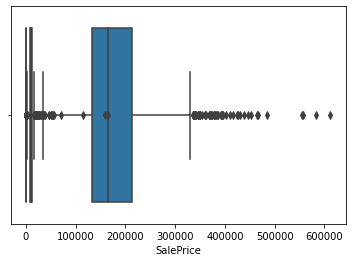

In [120]:
for column_names in outlier_column_names:
    import seaborn as sns
    sns.boxplot(x=train_data[column_names])
    upper_lim = train_data[column_names].quantile(.95)
    lower_lim = train_data[column_names].quantile(.05) # Top 5% means here the values that are out of the 95th percentile of data
    train_data[(train_data[column_names] < upper_lim) & (train_data[column_names] > lower_lim)]
    Q1 = train_data[column_names].quantile(0.25)
    Q3 = train_data[column_names].quantile(0.75)
    IQR = Q3 - Q1
    print(Q1, Q3, IQR)
    train_data = train_data[(train_data[column_names] < (Q3 + 1.5 * IQR)) & (train_data[column_names] > (Q1 - 1.5 * IQR))]

In [121]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [122]:
train_data.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,...,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000,1164.000000
mean,733.473368,53.436426,3.025773,66.716495,9329.644330,0.999141,1.903780,1.939863,2.817869,0.000859,...,1.497423,2.995704,3.453608,3.917526,42.168385,6.348797,2007.803265,7.519759,3.777491,172674.658076
std,421.368832,37.468867,0.608924,14.200155,2751.804354,0.029311,0.396918,1.419006,0.659208,0.029311,...,29.592111,0.087864,1.121392,0.408511,488.254848,2.708921,1.325699,1.602488,1.057004,55941.702137
min,1.000000,20.000000,0.000000,32.000000,2448.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,0.000000,0.000000,35311.000000
25%,368.750000,20.000000,3.000000,60.000000,7672.250000,1.000000,2.000000,0.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,5.000000,2007.000000,8.000000,4.000000,132500.000000
50%,740.500000,50.000000,3.000000,63.000000,9274.000000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,6.000000,2008.000000,8.000000,4.000000,162700.000000
75%,1096.500000,70.000000,3.000000,76.000000,11031.750000,1.000000,2.000000,3.000000,3.000000,0.000000,...,0.000000,3.000000,4.000000,4.000000,0.000000,8.000000,2009.000000,8.000000,4.000000,205000.000000
max,1460.000000,190.000000,4.000000,107.000000,16770.000000,1.000000,2.000000,3.000000,3.000000,1.000000,...,648.000000,3.000000,4.000000,4.000000,15500.000000,12.000000,2010.000000,8.000000,5.000000,328900.000000


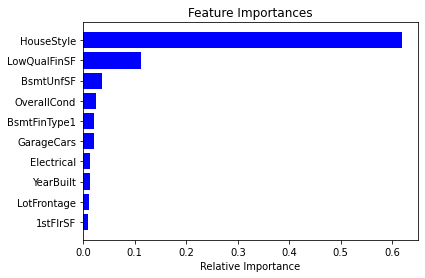

In [123]:
##### Feature Importance (Random Forrest)
x = train_data.drop(["Id","SalePrice"],axis=1)
y = train_data["SalePrice"]
# x = trial.drop(['SalePrice',"Id"],axis=1)
# y = trial["SalePrice"]
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib.pyplot as plt
model = RandomForestRegressor(n_estimators=100)
model.fit(x,y)
dict_importantance = dict(reversed(sorted(zip(model.feature_importances_, train_data.columns.values))))
features = train_data.drop(["SalePrice"],axis=1).columns
importances = model.feature_importances_
indices = np.argsort(importances)[-10:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

#### calculate the variance of all the numerical features

In [65]:
# num_train = train_data[numerical_data_column_names]

In [66]:
# var_check = pd.Series.sort_values(num_train.var())
# print(var_check)
# drop_ftr_var= var_check[var_check < 1.168628e+00].index
# drop_ftr_var

### 2. Correlation check

* High correlation between two variables means they have similar information.
* This can bring down the performance of some models drastically (linear and logistic regression models, for instance)
* Compute a correlation matrix
* What correlation value is too high? This is highly subjective and may need domain knowledge. 

In [67]:
# df = num_train.corr()
# df_1 = df[df > 0.5]
# df_2 = df[df_1 < 1]
# df_2
# corr_check = pd.Series.sort_values(df_2.apply(np.sum, axis=0))
# drop_columns = np.array(corr_check[corr_check > 0].index)
# drop_columns = np.delete(drop_columns,len(drop_columns)-1)
# drop_columns = np.append(drop_columns,"Id")

In [68]:
# drop_columns

In [69]:
# drop_combine = set(drop_columns).union(set(drop_ftr_var))

In [70]:
# train_data = train_data.drop(drop_combine,axis=1)

In [124]:
train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,2,3,3,0,...,0,3,4,4,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,2,3,3,0,...,0,3,4,4,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,2,0,3,0,...,0,3,4,4,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,2,0,3,0,...,0,3,4,4,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,2,0,3,0,...,0,3,4,4,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,0,3,4,4,0,8,2007,8,4,175000
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,0,3,2,4,0,2,2010,8,4,210000
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,0,3,0,2,2500,5,2010,8,4,266500
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,0,3,4,4,0,4,2010,8,4,142125


In [72]:
# train_data['log(x+1)'] = (train_data['LotArea']+1).transform(np.log)
# train_data

##### Principal Component Analysis (Dimensional Reduction)

In [133]:
from sklearn.preprocessing import StandardScaler
variables = train_data.columns
x = train_data.loc[:, variables].values
y = train_data.loc[:,['SalePrice']].values
x = StandardScaler().fit_transform(x)
x = pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,-1.739066,0.175249,-0.042344,-0.120931,-0.319798,0.029323,0.242522,0.747420,0.276406,-0.029323,...,-0.050624,0.048909,0.487454,0.201977,-0.086403,-1.606051,0.148465,0.299813,0.210599,0.640680
1,-1.736692,-0.892762,-0.042344,0.935850,0.098289,0.029323,0.242522,0.747420,0.276406,-0.029323,...,-0.050624,0.048909,0.487454,0.201977,-0.086403,-0.498123,-0.606178,0.299813,0.210599,0.157827
2,-1.734318,0.175249,-0.042344,0.090426,0.698153,0.029323,0.242522,-1.367645,0.276406,-0.029323,...,-0.050624,0.048909,0.487454,0.201977,-0.086403,0.979114,0.148465,0.299813,0.210599,0.908932
3,-1.731943,0.442252,-0.042344,-0.473191,0.080111,0.029323,0.242522,-1.367645,0.276406,-0.029323,...,-0.050624,0.048909,0.487454,0.201977,-0.086403,-1.606051,-1.360821,0.299813,-3.575308,-0.584335
4,-1.729569,0.175249,-0.042344,1.217658,1.792451,0.029323,0.242522,-1.367645,0.276406,-0.029323,...,-0.050624,0.048909,0.487454,0.201977,-0.086403,2.087042,0.148465,0.299813,0.210599,1.382843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1159,1.715450,0.175249,-0.042344,-0.332287,-0.513573,0.029323,0.242522,0.747420,0.276406,-0.029323,...,-0.050624,0.048909,0.487454,0.201977,-0.086403,0.609805,-0.606178,0.299813,0.210599,0.041585
1160,1.717824,-0.892762,-0.042344,1.288110,1.397995,0.029323,0.242522,0.747420,0.276406,-0.029323,...,-0.050624,0.048909,-1.296811,0.201977,-0.086403,-1.606051,1.657751,0.299813,0.210599,0.667505
1161,1.720199,0.442252,-0.042344,-0.050479,-0.104574,0.029323,0.242522,0.747420,0.276406,-0.029323,...,-0.050624,0.048909,-3.081076,-4.695962,5.036075,-0.498123,1.657751,0.299813,0.210599,1.677919
1162,1.722573,-0.892762,-0.042344,0.090426,0.140825,0.029323,0.242522,0.747420,0.276406,-0.029323,...,-0.050624,0.048909,0.487454,0.201977,-0.086403,-0.867433,1.657751,0.299813,0.210599,-0.546333


In [134]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,80
0,2.670658,0.342133,-1.031117,-2.538810,-0.996127,0.222144,-0.359813,1.218392,-0.261000,1.078722,...,-0.329061,0.261206,-0.237776,-0.266516,0.073354,-0.045551,-0.017857,0.047538,-2.703050e-15,-3.658550e-16
1,0.315273,-1.859442,1.959490,0.286849,-0.206731,-0.338734,-1.258048,-0.468090,0.280185,-0.563079,...,-0.269421,0.464369,-0.088084,0.120487,-0.178188,0.080886,0.062299,-0.017095,1.841995e-15,-2.506424e-15
2,3.311467,0.382247,-0.460074,-1.854802,-1.157616,-0.196410,-0.482306,0.139370,-0.225105,1.370461,...,0.332337,-0.515635,0.150095,0.019011,-0.097856,0.194930,-0.067440,0.001426,-8.939039e-16,-6.332525e-16
3,-1.103616,1.575829,0.509125,-0.138440,0.029340,-2.020710,-1.200486,0.973998,-0.627130,1.343579,...,-0.194793,0.383127,0.165348,0.600414,0.755443,1.125177,0.084541,0.023037,2.823024e-15,5.796920e-16
4,5.819413,1.891670,1.544712,-1.171733,-0.392031,0.155690,-1.246270,1.360729,0.092828,1.428168,...,0.038669,0.080837,-0.181355,-0.432357,-0.223322,0.306556,0.257259,0.058296,5.544053e-15,3.971899e-16


### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.
This can be determined by looking at the cumulative *explained variance ratio* as a function of the number of components:

In [135]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.31910395e-01, 5.46410987e-02, 4.70041632e-02, 3.53057845e-02,
       3.06263868e-02, 2.86339341e-02, 2.48824237e-02, 2.33761467e-02,
       2.15639920e-02, 2.08277353e-02, 1.99199465e-02, 1.92947166e-02,
       1.85964401e-02, 1.77498076e-02, 1.71521742e-02, 1.66479984e-02,
       1.56989027e-02, 1.52785479e-02, 1.49763106e-02, 1.45430321e-02,
       1.42191439e-02, 1.38178695e-02, 1.36231858e-02, 1.34250110e-02,
       1.29031005e-02, 1.27611859e-02, 1.21938013e-02, 1.18481998e-02,
       1.16135789e-02, 1.15517349e-02, 1.11449337e-02, 1.11041429e-02,
       1.10043392e-02, 1.08332973e-02, 1.01033741e-02, 9.96806018e-03,
       9.76891333e-03, 9.61603637e-03, 9.49558814e-03, 9.05157783e-03,
       9.02327607e-03, 8.61941130e-03, 8.37769311e-03, 8.11395089e-03,
       7.79131434e-03, 7.72901317e-03, 7.38793079e-03, 7.08418994e-03,
       7.00847051e-03, 6.76075490e-03, 6.59420210e-03, 6.18959983e-03,
       6.07880328e-03, 5.63847919e-03, 5.37484246e-03, 5.32984320e-03,
      

In [136]:
rslt = np.cumsum(pca.explained_variance_ratio_)
rslt

array([0.1319104 , 0.18655149, 0.23355566, 0.26886144, 0.29948783,
       0.32812176, 0.35300419, 0.37638033, 0.39794432, 0.41877206,
       0.43869201, 0.45798672, 0.47658316, 0.49433297, 0.51148515,
       0.52813314, 0.54383205, 0.55911059, 0.5740869 , 0.58862994,
       0.60284908, 0.61666695, 0.63029014, 0.64371515, 0.65661825,
       0.66937943, 0.68157323, 0.69342143, 0.70503501, 0.71658675,
       0.72773168, 0.73883582, 0.74984016, 0.76067346, 0.77077684,
       0.7807449 , 0.79051381, 0.80012985, 0.80962543, 0.81867701,
       0.82770029, 0.8363197 , 0.84469739, 0.85281134, 0.86060266,
       0.86833167, 0.8757196 , 0.88280379, 0.88981226, 0.89657302,
       0.90316722, 0.90935682, 0.91543562, 0.9210741 , 0.92644894,
       0.93177879, 0.93699604, 0.94202851, 0.94693114, 0.95177027,
       0.95626396, 0.96060708, 0.96493705, 0.96888848, 0.97259318,
       0.97580697, 0.97894523, 0.98190481, 0.98456292, 0.98707016,
       0.98935742, 0.99146383, 0.99324327, 0.99489366, 0.99631

In [137]:
np.where(rslt < 0.99)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70], dtype=int64),)

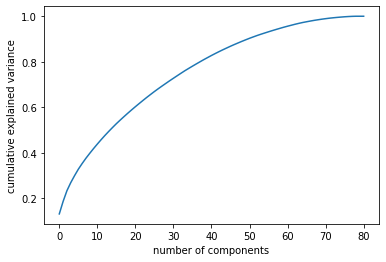

In [138]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(list(range(0,len(np.cumsum(pca.explained_variance_ratio_)))), np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [153]:
pca_train_data = train_data.iloc[:,list(range(0,70))]
np.array(pca_train_data.columns)
pca_train_data

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch
0,1,60,3,65.0,8450,1,2,3,3,0,...,1,2,548,4,4,2,0,61,0,0
1,2,20,3,80.0,9600,1,2,3,3,0,...,1,2,460,4,4,2,298,0,0,0
2,3,60,3,68.0,11250,1,2,0,3,0,...,1,2,608,4,4,2,0,42,0,0
3,4,70,3,60.0,9550,1,2,0,3,0,...,2,3,642,4,4,2,0,35,272,0
4,5,60,3,84.0,14260,1,2,0,3,0,...,1,3,836,4,4,2,192,84,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,3,62.0,7917,1,2,3,3,0,...,1,2,460,4,4,2,0,40,0,0
1456,1457,20,3,85.0,13175,1,2,3,3,0,...,2,2,500,4,4,2,349,0,0,0
1457,1458,70,3,66.0,9042,1,2,3,3,0,...,1,1,252,4,4,2,0,60,0,0
1458,1459,20,3,68.0,9717,1,2,3,3,0,...,2,1,240,4,4,2,366,0,112,0


##### Decision Tree Regression

In [147]:
from sklearn import tree
from sklearn.model_selection import train_test_split
# x = train_data[random_for_ftr]
# y = train_data["SalePrice"]
x = trial.drop(["Id"],axis=1).values
y = train_data["SalePrice"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
clf = tree.DecisionTreeRegressor().fit(x_train,y_train)
y_pred = clf.predict(x_test)
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 21384.34
Mean Squared Error: 836932498.1285714
Root Mean Squared Error: 28929.785656457454
R-squared Error: 0.7386203446581637


In [148]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,109900.0
126,128000,99500.0
974,167500,222000.0
845,171000,144500.0
950,129000,133700.0


##### Support Vector Regression

In [149]:
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
regr = svm.SVR(kernel="linear")
regr.fit(x_train,y_train)
y_pred = regr.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 17651.236025560993
Mean Squared Error: 611283132.9901379
Root Mean Squared Error: 24724.140692653767
R-squared Error: 0.8090921609872833


In [150]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,133951.304638
126,128000,132535.479270
974,167500,174406.358755
845,171000,207350.265011
950,129000,139926.530810


##### KNN Regressor

In [151]:
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=7)
neigh.fit(x_train, y_train)
y_pred = neigh.predict(x_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R-squared Error:', metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 23838.13142857143
Mean Squared Error: 1120758013.9537024
Root Mean Squared Error: 33477.724145373184
R-squared Error: 0.6499797246924242


In [152]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
957,132000,150171.428571
126,128000,122414.285714
974,167500,189057.142857
845,171000,228928.571429
950,129000,126100.000000
